In [2]:
import geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
county = "hillsborough"
county_csv = pd.read_csv(f"Housing Loss Data/{county}_fl_processed_2017_to_2019_20210916.csv")

In [16]:
county_csv.head() # county_GEOID is FIPS, only one for the county

,census_tract_GEOID,total-households,total-renter-occupied-households,total-owner-occupied-households,total-owner-occupied-households-mortgage,median-gross-rent,median-household-income,median-property-value,median-monthly-housing-cost,pct-white,...,lien-foreclosure-rate-2019,avg-eviction-rate,ratio-to-mean-foreclosure-rate,ratio-to-mean-eviction-rate,avg-housing-loss-rate,evictions-pct-total-housing-loss,housing-loss-index,county_GEOID,county,state
0,12057000401,926,338,588,432,1055,48426,148200,1172,669,...,NaN,4.879664,0.655993,2.154130,2.401723,0.891853,1.583222,12057,Hillsborough County,Florida
1,12057010105,1496,381,1115,653,879,53860,232000,1549,1431,...,0.000000,1.612298,1.012621,0.711750,1.045408,0.568282,0.689136,12057,Hillsborough County,Florida
2,12057010203,766,395,371,197,846,39018,96500,1155,524,...,0.269542,5.080382,2.877047,2.242737,4.065458,0.833801,2.679961,12057,Hillsborough County,Florida
3,12057010600,1108,354,754,481,1095,80600,234300,1584,817,...,NaN,10.003766,0.785556,4.416168,4.560479,0.929972,3.006280,12057,Hillsborough County,Florida
4,12057002300,1419,599,820,592,1138,62636,212600,1400,1159,...,0.000000,0.962565,1.037179,0.424925,0.847951,0.570919,0.558972,12057,Hillsborough County,Florida


In [37]:
county_csv.columns

Index(['census_tract_GEOID', 'total-households',
       'total-renter-occupied-households', 'total-owner-occupied-households',
       'total-owner-occupied-households-mortgage', 'median-gross-rent',
       'median-household-income', 'median-property-value',
       'median-monthly-housing-cost', 'pct-white', 'pct-af-am', 'pct-hispanic',
       'pct-am-indian', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other',
       'pct-below-poverty-level', 'households-children',
       'single-parent-household', 'older-adult-alone', 'level-of-education',
       'immigrant-status', 'english-fluency', 'drive-to-work',
       'public-transport-to-work', 'vacant-properties', 'live-in-mobile-home',
       'pct-renter-occupied', 'pct-owner-occupied',
       'pct-owner-occupied-mortgage', 'pct-owner-occupied-without-mortgage',
       'median-house-age', 'pct-non-white', 'pct-without-health-insurance',
       'total-evictions', 'avg-evictions', 'total-foreclosure-sales',
       'avg-foreclosure-sales', 

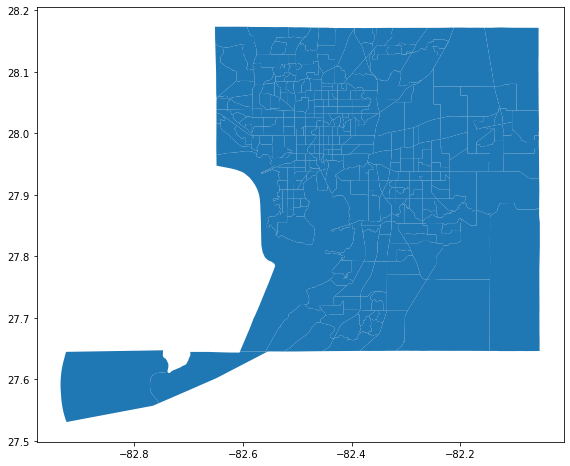

In [4]:
# https://coderzcolumn.com/tutorials/data-science/plotting-static-maps-with-geopandas-working-with-geospatial-data
flordia = geopandas.read_file(f"Housing Loss Data/{county}_fl_2010_tracts_formatted.geojson")

flordia.plot(figsize=(12,8));

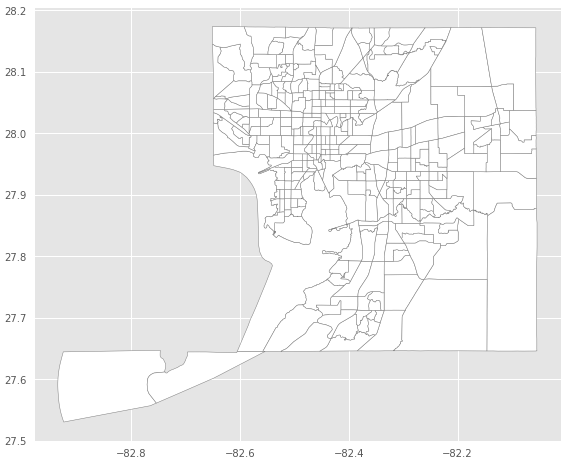

In [5]:
with plt.style.context(("seaborn", "ggplot")):
    flordia.plot(figsize=(12,8), color="white", edgecolor="grey");

In [7]:
flordia.head()

,census_tract_GEOID,geometry
0,12057006900,"POLYGON ((-82.50651 27.87912, -82.50648 27.877..."
1,12057010214,"POLYGON ((-82.29064 28.12917, -82.28969 28.129..."
2,12057011518,"POLYGON ((-82.64091 28.11842, -82.64089 28.116..."
3,12057013920,"POLYGON ((-82.26150 27.76278, -82.26116 27.762..."
4,12057010305,"POLYGON ((-82.35768 27.99625, -82.35773 27.995..."


In [9]:
county_csv['census_tract_GEOID_int'] = county_csv['census_tract_GEOID'].astype(int)
flordia['census_tract_GEOID_int'] = flordia['census_tract_GEOID'].astype(int)

flordia_final = flordia.merge(county_csv, on="census_tract_GEOID_int", how="left")
print("Type of DataFrame : ", type(flordia_final))
flordia_final.head(1)

Type of DataFrame :  <class 'geopandas.geodataframe.GeoDataFrame'>


,census_tract_GEOID_x,geometry,census_tract_GEOID_int,census_tract_GEOID_y,total-households,total-renter-occupied-households,total-owner-occupied-households,total-owner-occupied-households-mortgage,median-gross-rent,median-household-income,...,lien-foreclosure-rate-2019,avg-eviction-rate,ratio-to-mean-foreclosure-rate,ratio-to-mean-eviction-rate,avg-housing-loss-rate,evictions-pct-total-housing-loss,housing-loss-index,county_GEOID,county,state
0,12057006900,"POLYGON ((-82.50651 27.87912, -82.50648 27.877...",12057006900,12057006900,2458,679,1779,1077,1237,71310,...,0.0,2.120766,0.657821,0.936213,1.104784,0.742268,0.728276,12057,Hillsborough County,Florida


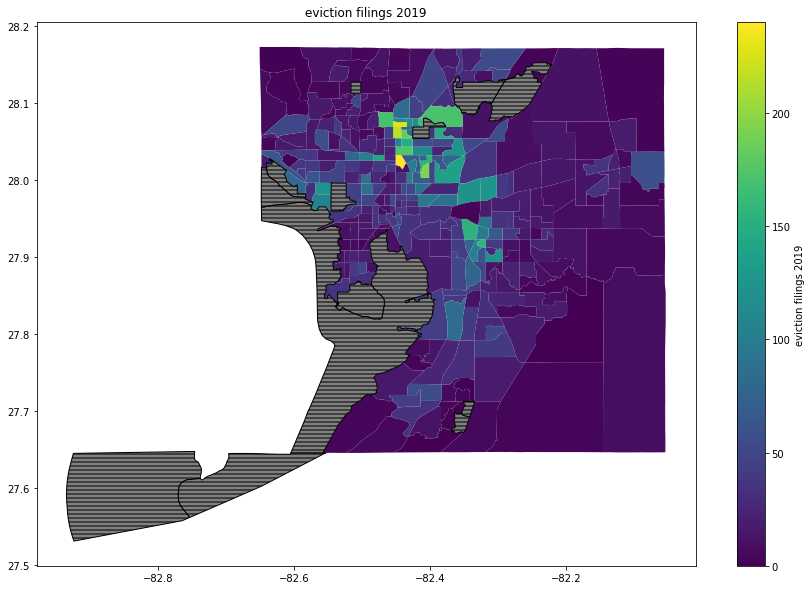

In [20]:
flordia_final.plot("eviction-filings-2019", figsize=(15,10), legend=True,legend_kwds={"label":"eviction filings 2019"},
                  missing_kwds={
                               "color":"grey",
                               "edgecolor":"black",
                               "hatch":"---",
                               "label":"Missing Values"
                           })
plt.title("eviction filings 2019");

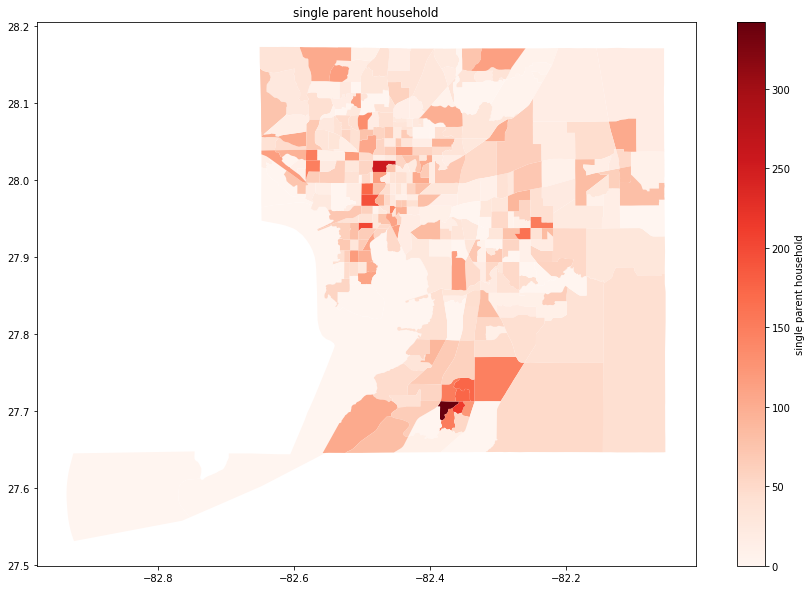

In [21]:
column = "single-parent-household"

flordia_final.plot(column, figsize=(15,10), legend=True,legend_kwds={"label":column.replace("-", " ")},
                      cmap=plt.cm.Reds,
                                    missing_kwds={
                               "color":"grey",
                               "edgecolor":"black",
                               "hatch":"---",
                               "label":"Missing Values"
                           })
plt.title(column.replace("-", " "));

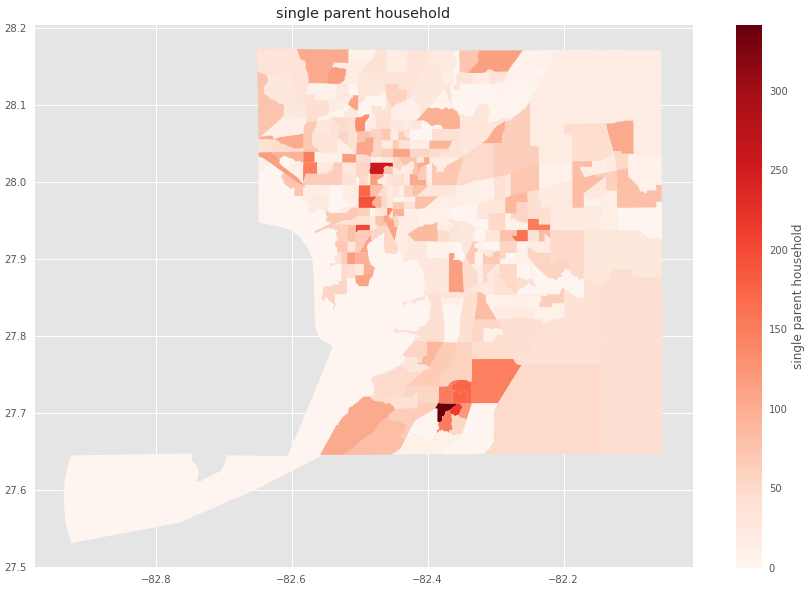

In [22]:
column = "single-parent-household"
with plt.style.context(("seaborn", "ggplot")):
    flordia_final.plot(column, figsize=(15,10), legend=True,legend_kwds={"label":column.replace("-", " ")},
                      cmap=plt.cm.Reds,                  
                       missing_kwds={
                               "color":"grey",
                               "edgecolor":"black",
                               "hatch":"---",
                               "label":"Missing Values"
                           })
    plt.title(column.replace("-", " "));

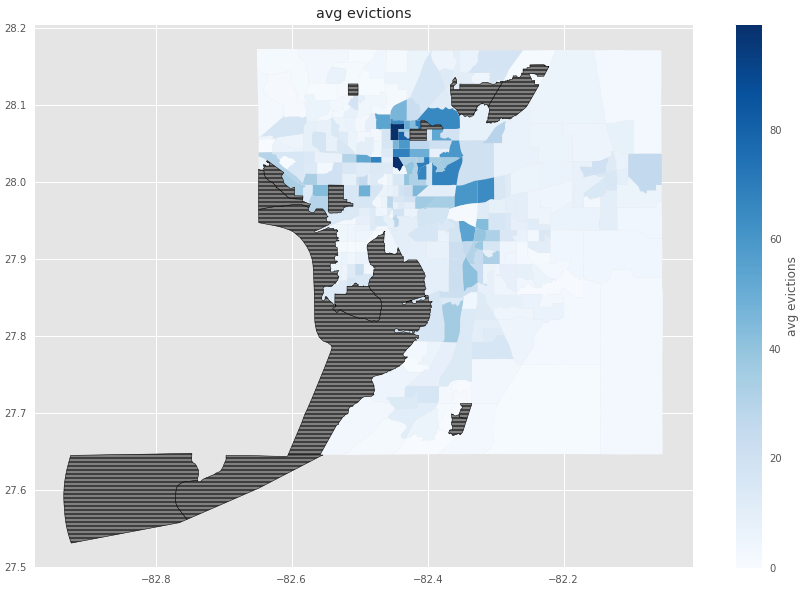

In [23]:
column = "avg-evictions"
with plt.style.context(("seaborn", "ggplot")):
    flordia_final.plot(column, figsize=(15,10), legend=True,legend_kwds={"label":column.replace("-", " ")},
                      cmap=plt.cm.Blues,
                                missing_kwds={
                               "color":"grey",
                               "edgecolor":"black",
                               "hatch":"---",
                               "label":"Missing Values"
                           })
    plt.title(column.replace("-", " "));

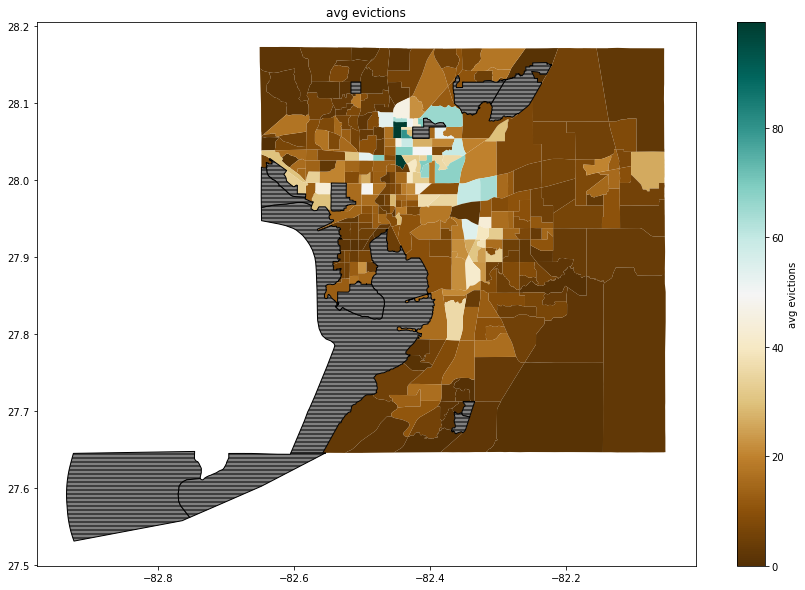

In [24]:
flordia_final.plot(column, figsize=(15,10), legend=True,legend_kwds={"label":column.replace("-", " ")},
                      cmap=plt.cm.BrBG,
                      missing_kwds={
                               "color":"grey",
                               "edgecolor":"black",
                               "hatch":"---",
                               "label":"Missing Values"
                           })
plt.title(column.replace("-", " "));

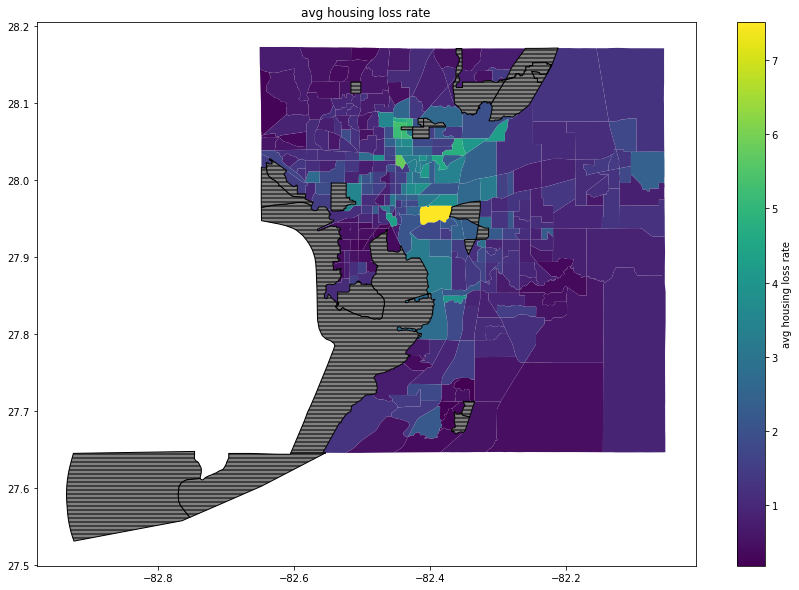

In [28]:
column = "avg-housing-loss-rate"

flordia_final.plot(column, figsize=(15,10), legend=True,legend_kwds={"label":column.replace("-", " ")},
                                missing_kwds={
                               "color":"grey",
                               "edgecolor":"black",
                               "hatch":"---",
                               "label":"Missing Values"
                           })
plt.title(column.replace("-", " "));

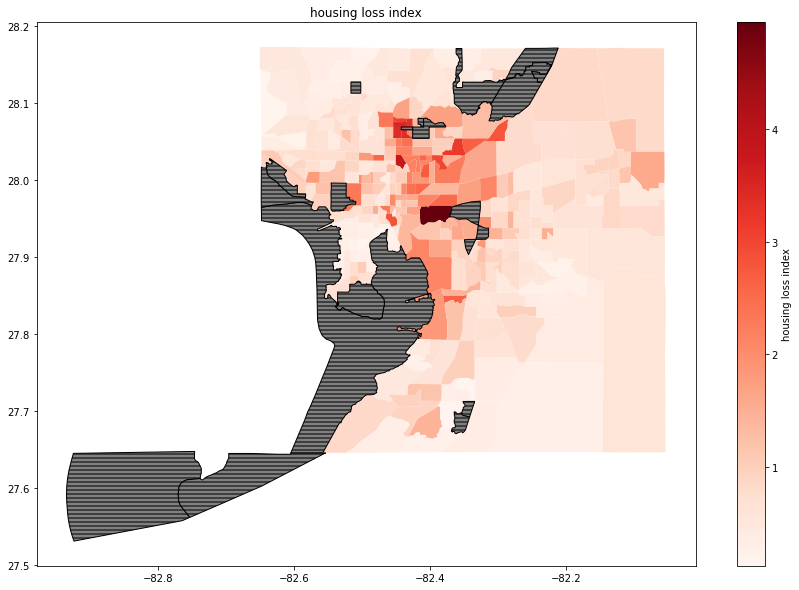

In [30]:
column = "housing-loss-index"
flordia_final.plot(column, figsize=(15,10), legend=True,legend_kwds={"label":column.replace("-", " ")},
                      cmap=plt.cm.Reds,
                      missing_kwds={
                               "color":"grey",
                               "edgecolor":"black",
                               "hatch":"---",
                               "label":"Missing Values"
                           })
plt.title(column.replace("-", " "));

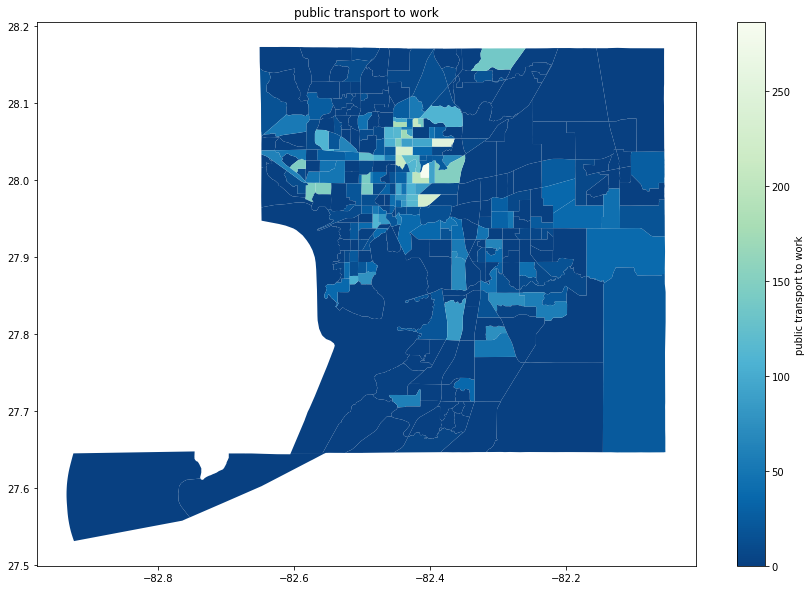

In [44]:
column = "public-transport-to-work"
flordia_final.plot(column, figsize=(15,10), legend=True,legend_kwds={"label":column.replace("-", " ")},
                      cmap=plt.cm.GnBu_r,
                      missing_kwds={
                               "color":"grey",
                               "edgecolor":"black",
                               "hatch":"---",
                               "label":"Missing Values"
                           })
plt.title(column.replace("-", " "));

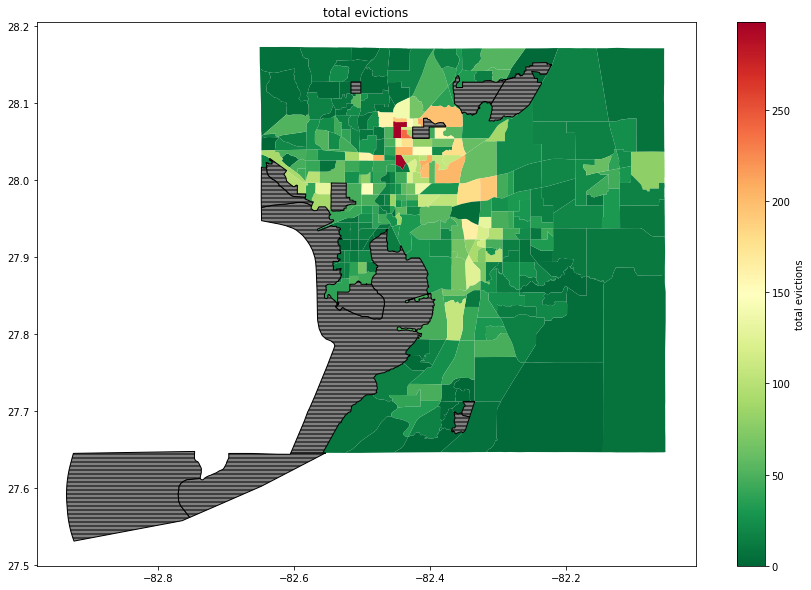

In [39]:
column = "total-evictions"
flordia_final.plot(column, figsize=(15,10), legend=True,legend_kwds={"label":column.replace("-", " ")},
                      cmap=plt.cm.RdYlGn_r,
                      missing_kwds={
                               "color":"grey",
                               "edgecolor":"black",
                               "hatch":"---",
                               "label":"Missing Values"
                           })
plt.title(column.replace("-", " "));

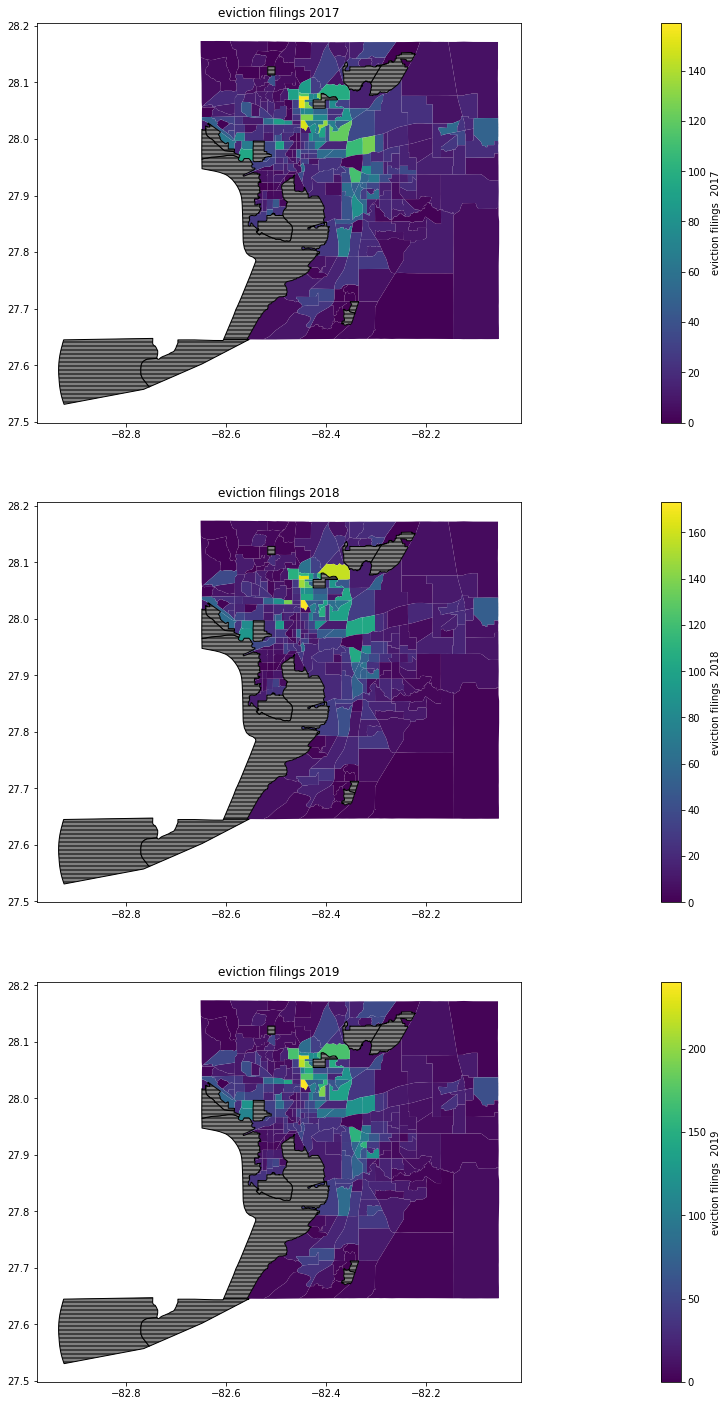

In [25]:
# multi year
column_suffix = "eviction-filings-"
year = 2017

plt.figure(figsize=(50,25))
ax1 = plt.subplot(311)
flordia_final.plot(column_suffix+str(year), figsize=(15,10), legend=True,
                   legend_kwds={"label":column_suffix.replace("-", " ") + " " + str(year)},
                   ax=ax1,
                   missing_kwds={
                     "color":"grey",
                     "edgecolor":"black",
                      "hatch":"---",
                     "label":"Missing Values"
                           })
plt.title(column_suffix.replace("-", " ") + str(year));

ax2 = plt.subplot(312)
flordia_final.plot(column_suffix+str(year+1), figsize=(15,10), legend=True,
                   legend_kwds={"label":column_suffix.replace("-", " ") + " " + str(year+1)},
                   ax=ax2,
                    missing_kwds={
                     "color":"grey",
                     "edgecolor":"black",
                      "hatch":"---",
                     "label":"Missing Values"
                           })
plt.title(column_suffix.replace("-", " ") +  str(year+1));

ax3 = plt.subplot(313)
flordia_final.plot(column_suffix+str(year+2), figsize=(15,10), legend=True,
                   legend_kwds={"label":column_suffix.replace("-", " ") + " " + str(year+2)},
                  ax=ax3,
                    missing_kwds={
                     "color":"grey",
                     "edgecolor":"black",
                      "hatch":"---",
                     "label":"Missing Values"
                           })
plt.title(column_suffix.replace("-", " ") +  str(year+2));

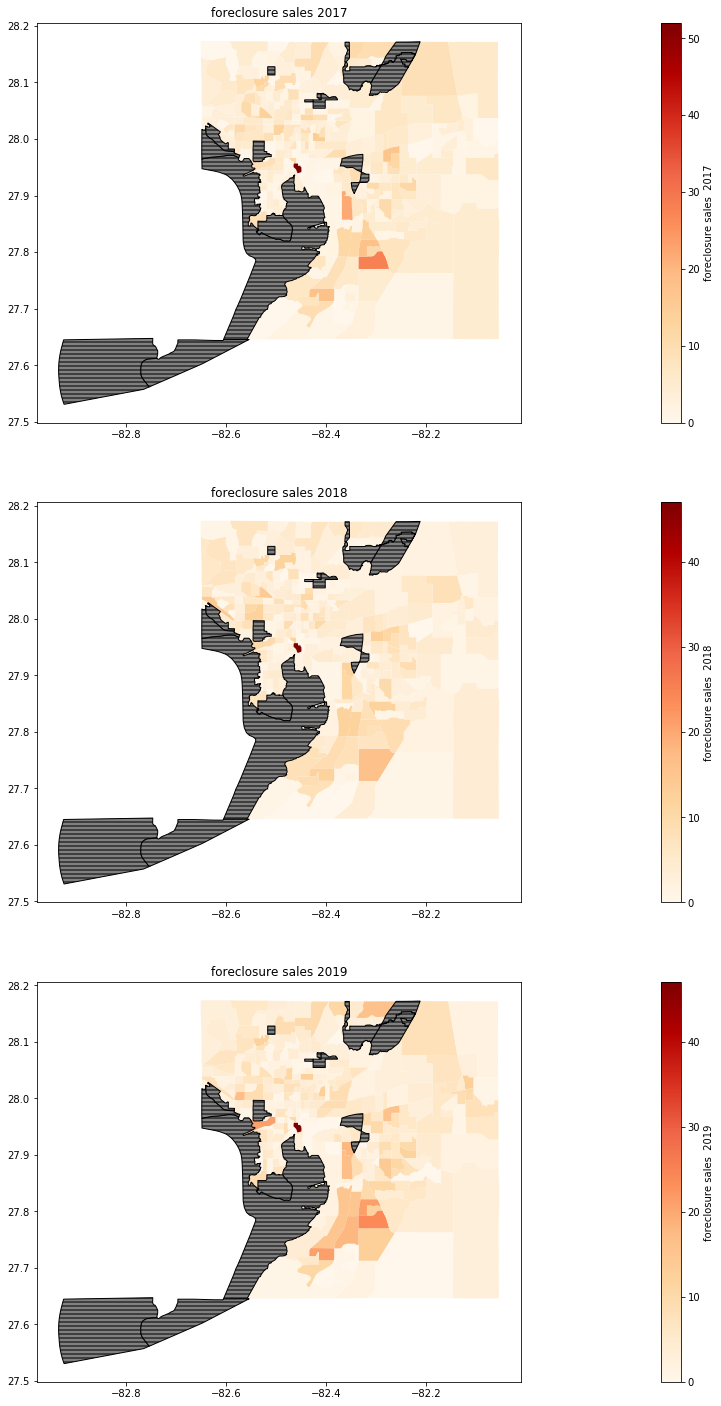

In [26]:
# multi year
column_suffix = "foreclosure-sales-"
year = 2017

plt.figure(figsize=(50,25))
ax1 = plt.subplot(311)
flordia_final.plot(column_suffix+str(year), figsize=(15,10), legend=True, cmap=plt.cm.OrRd,
                   legend_kwds={"label":column_suffix.replace("-", " ") + " " + str(year)},
                   ax=ax1,
                    missing_kwds={
                     "color":"grey",
                     "edgecolor":"black",
                      "hatch":"---",
                     "label":"Missing Values"
                           })
plt.title(column_suffix.replace("-", " ") + str(year));

ax2 = plt.subplot(312)
flordia_final.plot(column_suffix+str(year+1), figsize=(15,10), legend=True, cmap=plt.cm.OrRd,
                   legend_kwds={"label":column_suffix.replace("-", " ") + " " + str(year+1)},
                   ax=ax2,
                    missing_kwds={
                     "color":"grey",
                     "edgecolor":"black",
                      "hatch":"---",
                     "label":"Missing Values"
                           })
plt.title(column_suffix.replace("-", " ") +  str(year+1));

ax3 = plt.subplot(313)
flordia_final.plot(column_suffix+str(year+2), figsize=(15,10), legend=True, cmap=plt.cm.OrRd,
                   legend_kwds={"label":column_suffix.replace("-", " ") + " " + str(year+2)},
                  ax=ax3,
                    missing_kwds={
                     "color":"grey",
                     "edgecolor":"black",
                      "hatch":"---",
                     "label":"Missing Values"
                           })
plt.title(column_suffix.replace("-", " ") +  str(year+2));

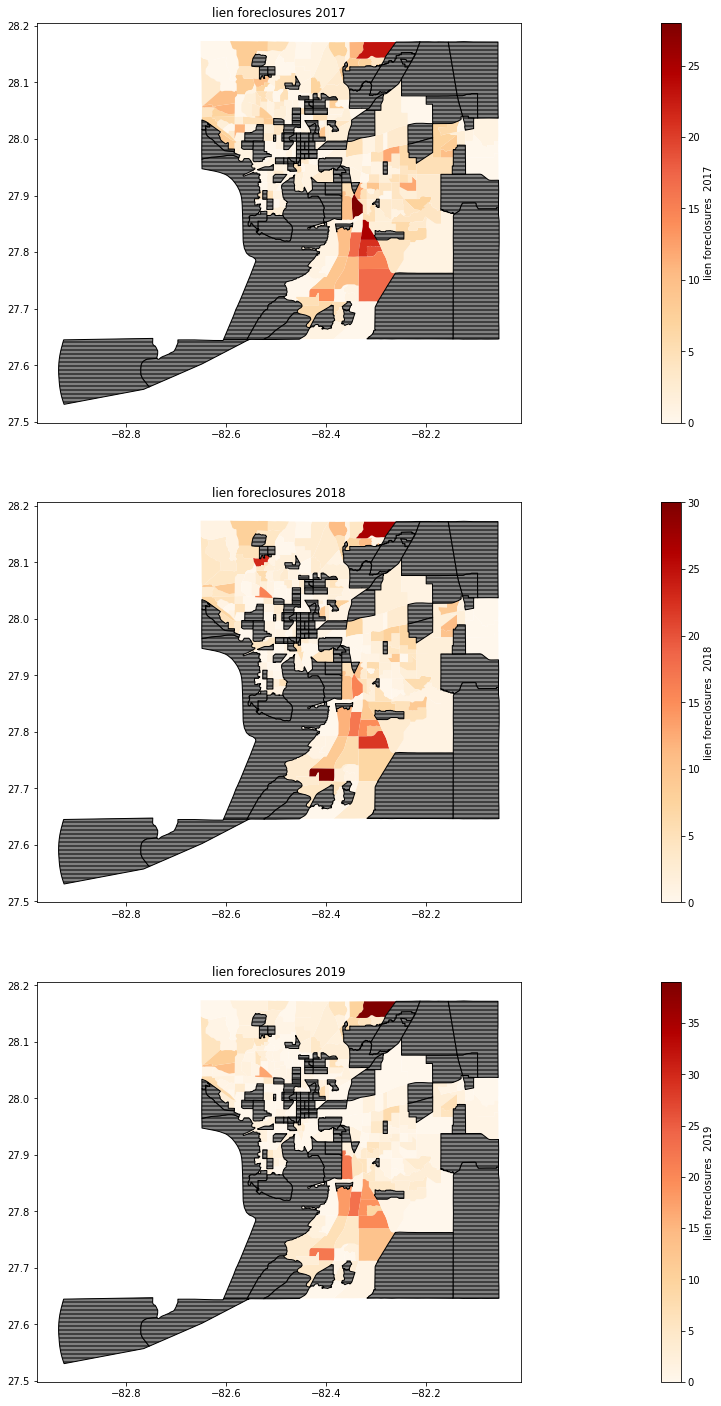

In [43]:
# multi year
column_suffix = "lien-foreclosures-"
year = 2017

plt.figure(figsize=(50,25))
ax1 = plt.subplot(311)
flordia_final.plot(column_suffix+str(year), figsize=(15,10), legend=True, cmap=plt.cm.OrRd,
                   legend_kwds={"label":column_suffix.replace("-", " ") + " " + str(year)},
                   ax=ax1,
                    missing_kwds={
                     "color":"grey",
                     "edgecolor":"black",
                      "hatch":"---",
                     "label":"Missing Values"
                           })
plt.title(column_suffix.replace("-", " ") + str(year));

ax2 = plt.subplot(312)
flordia_final.plot(column_suffix+str(year+1), figsize=(15,10), legend=True, cmap=plt.cm.OrRd,
                   legend_kwds={"label":column_suffix.replace("-", " ") + " " + str(year+1)},
                   ax=ax2,
                    missing_kwds={
                     "color":"grey",
                     "edgecolor":"black",
                      "hatch":"---",
                     "label":"Missing Values"
                           })
plt.title(column_suffix.replace("-", " ") +  str(year+1));

ax3 = plt.subplot(313)
flordia_final.plot(column_suffix+str(year+2), figsize=(15,10), legend=True, cmap=plt.cm.OrRd,
                   legend_kwds={"label":column_suffix.replace("-", " ") + " " + str(year+2)},
                  ax=ax3,
                    missing_kwds={
                     "color":"grey",
                     "edgecolor":"black",
                      "hatch":"---",
                     "label":"Missing Values"
                           })
plt.title(column_suffix.replace("-", " ") +  str(year+2));


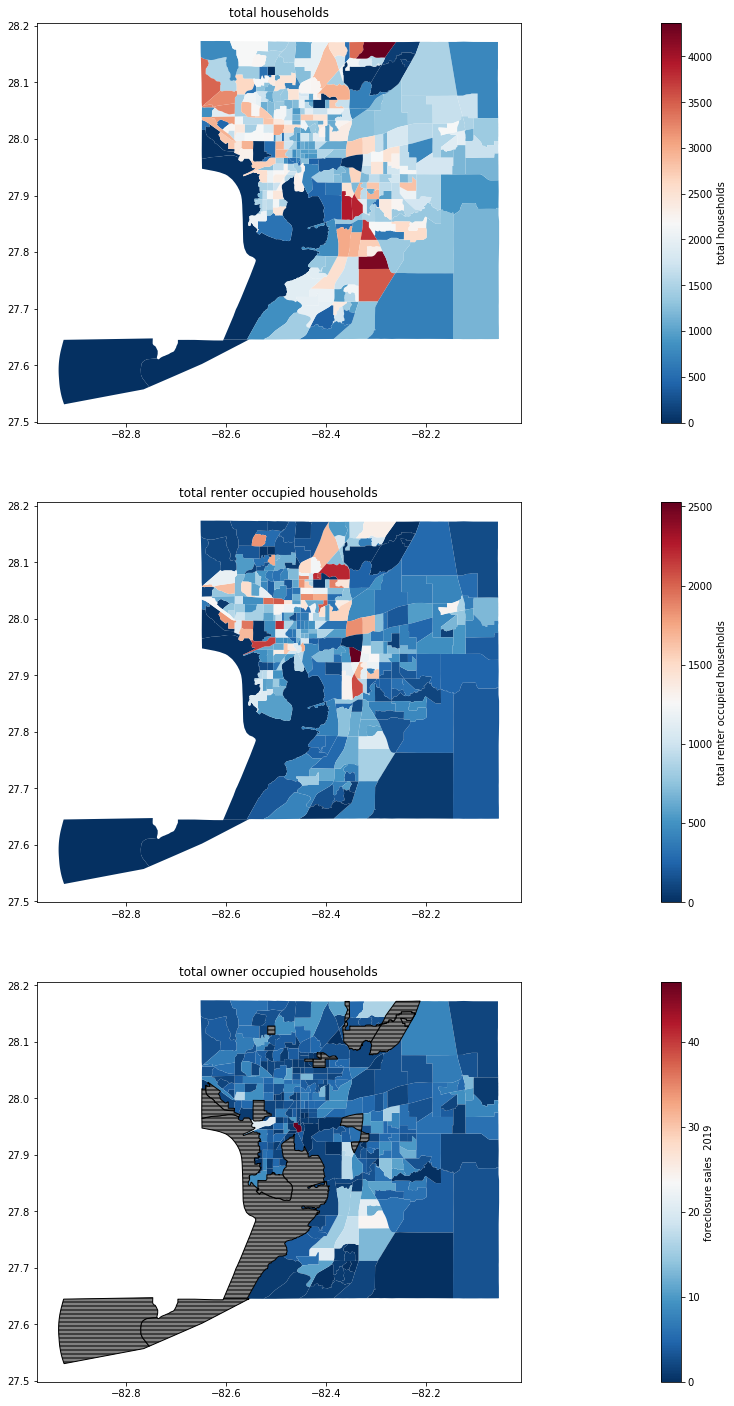

In [36]:
# total-households	total-renter-occupied-households	total-owner-occupied-households

plt.figure(figsize=(50,25))
ax1 = plt.subplot(311)
column ="total-households"
flordia_final.plot(column, figsize=(15,10), legend=True, cmap=plt.cm.RdBu_r,
                   legend_kwds={"label":column.replace("-", " ")},
                   ax=ax1,
                    missing_kwds={
                     "color":"grey",
                     "edgecolor":"black",
                      "hatch":"---",
                     "label":"Missing Values"
                           })
plt.title(column.replace("-", " "));

ax2 = plt.subplot(312)
column = "total-renter-occupied-households"
flordia_final.plot(column, figsize=(15,10), legend=True, cmap=plt.cm.RdBu_r,
                   legend_kwds={"label":column.replace("-", " ")},
                   ax=ax2,
                    missing_kwds={
                     "color":"grey",
                     "edgecolor":"black",
                      "hatch":"---",
                     "label":"Missing Values"
                           })
plt.title(column.replace("-", " "));

ax3 = plt.subplot(313)
column = "total-owner-occupied-households"
flordia_final.plot(column_suffix+str(year+2), figsize=(15,10), legend=True, cmap=plt.cm.RdBu_r,
                   legend_kwds={"label":column_suffix.replace("-", " ") + " " + str(year+2)},
                  ax=ax3,
                    missing_kwds={
                     "color":"grey",
                     "edgecolor":"black",
                      "hatch":"---",
                     "label":"Missing Values"
                           })
plt.title(column.replace("-", " "));